# Whole brain data processing

In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import fish_proc.wholeBrainDask.cellProcessing_single_WS as fwc

In [2]:
# save_root = '/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20190426/fish03/7dpf_HuC-H2B_GCaMP7ff_GU-slow-fwd_fish03_exp02_20190426_221213/'
# save_root = '/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20190430/fish01/6dpf_HuC-GCaMP7ff-GFAP-RGECO_GU-slow-fwd_fish01_exp01_20190430_174349/'
save_root = '/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20190907/fish00/7dpf_HuC-GC7FF_GU-fwd_fish00_exp01_20190907_172639/'

In [3]:
brain_map = np.load(save_root+'Y_ave.npy')

In [4]:
# dense
# _ = np.load(save_root+'cell_raw_dff.npz', allow_pickle=True)
# sparse
_ = np.load(save_root+'cell_raw_dff_sparse.npz', allow_pickle=True)
A = _['A']
F_ = _['F']
A_loc = _['A_loc']

In [5]:
print(A.shape)
print(F_.shape)
print(A_loc.shape)

(505000, 100, 100)
(505000, 27864)
(505000, 3)


In [6]:
# cell_id = 175000
cell_id = 110000
A_ = A[cell_id]
A_loc_ = A_loc[cell_id]
z, x, y = A_loc_
A_ext = np.zeros((brain_map.shape[1],brain_map.shape[2]))
A_ext[x:x+100, y:y+100]=A_

In [7]:
A_loc.max(axis=0)

array([  25, 1080, 1984])

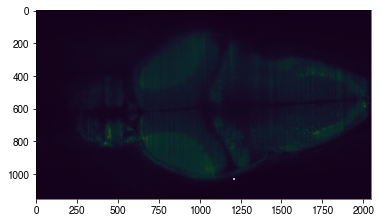

In [8]:
plt.imshow(brain_map[z].squeeze())
plt.imshow(A_ext>0, cmap='gray', alpha=0.7)

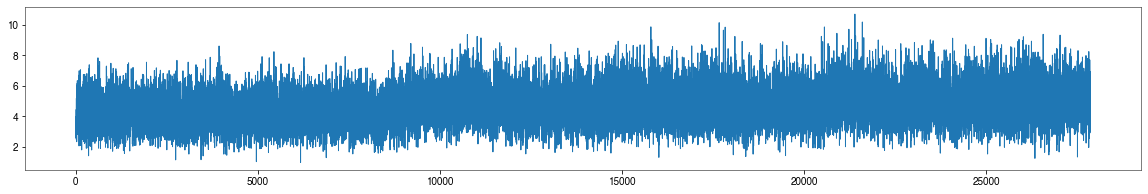

In [9]:
plt.figure(figsize=(20, 3))
plt.plot(F_[cell_id])
plt.show()

In [10]:
baseline_ = fwc.baseline(F_[cell_id], window=1000, percentile=20, downsample=10)

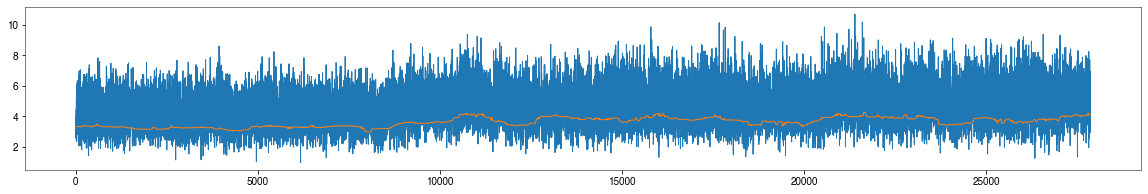

In [11]:
plt.figure(figsize=(20, 3))
plt.plot(F_[cell_id])
plt.plot(baseline_)
plt.show()

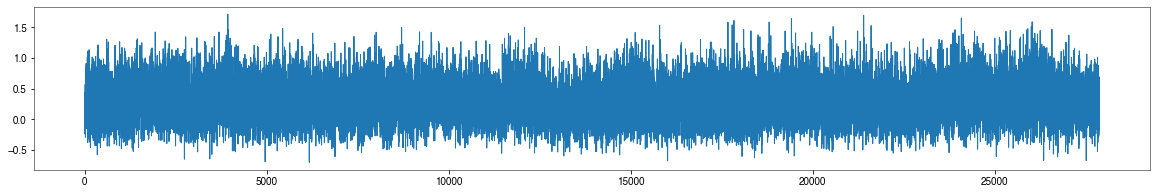

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(F_[cell_id]/baseline_-1)
plt.show()

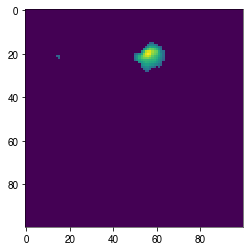

In [13]:
# plt.imshow(A_[:dx, :dy])
plt.imshow(A_)

In [8]:
A_ext = np.zeros((brain_map.shape[1],brain_map.shape[2])).astype('int')
for n_, A_ in enumerate(A):
    A_loc_ = A_loc[n_]
    z, x, y = A_loc_
    if z==10:
        _ = (A_>A_.max()*0.4).astype('int')*(n_+1)
        cx, cy = A_ext[x:x+100, y:y+100].shape
        A_ext[x:x+100, y:y+100]=np.maximum(A_ext[x:x+100, y:y+100], _[:cx, :cy])

In [80]:
mask_ = np.zeros((brain_map.shape[1],brain_map.shape[2])).astype('int')
mask_[648:720, 192:256]=1

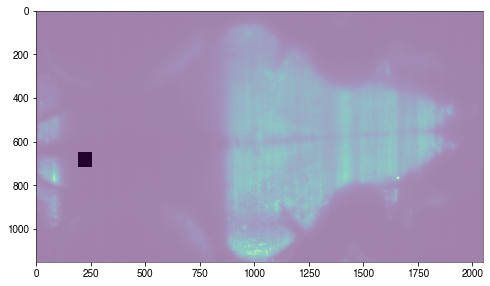

In [81]:
plt.figure(figsize=(8, 8))
plt.imshow(brain_map[10].squeeze())
plt.imshow(mask_, cmap='gray_r', alpha=0.5)
# plt.xlim([200,400])
# plt.ylim([600,800])

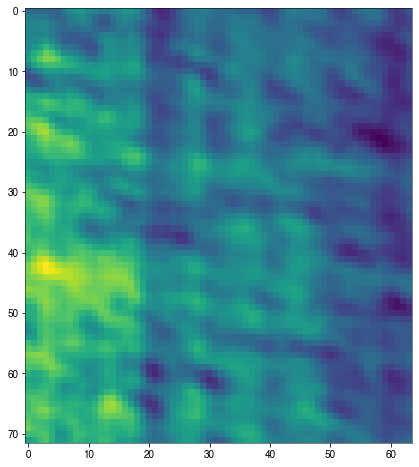

In [82]:
dx = 72
dy = 64
nx = 9
ny = 3
plt.figure(figsize=(8, 8))
plt.imshow(brain_map[10].squeeze()[dx*nx:dx*(nx+1), dy*ny:dy*(ny+1)])

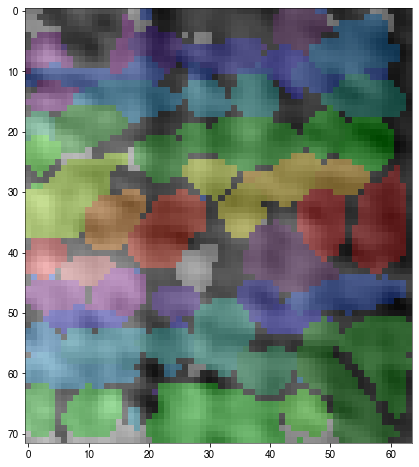

In [94]:
plt.figure(figsize=(8, 8))
img = brain_map[10].squeeze()[dx*nx:dx*(nx+1), dy*ny:dy*(ny+1)]
plt.imshow(img, cmap='gray')
plt.imshow(A_ext[dx*nx:dx*(nx+1), dy*ny:dy*(ny+1)]%32, cmap=plt.cm.nipy_spectral, alpha=0.3)
# plt.xlim([182,256])
# plt.ylim([648,720])

In [84]:
A_ext[648:720, 192:256]

array([[     0,      0,      0, ...,      0, 415008, 415008],
       [     0, 415007, 415007, ..., 415008, 415008, 415008],
       [415007, 415007, 415007, ...,      0, 415008, 415008],
       ...,
       [415007, 415056, 415056, ...,      0,      0,      0],
       [415007, 415056, 415056, ...,      0,      0,      0],
       [415007, 415007, 415007, ...,      0,      0,      0]])